In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the libraries as shown below
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing import image

In [ ]:
#DATA PRE PROCESSING
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image

image_directory = '/content/drive/MyDrive/Colab Notebooks/DATA_NEW/'
SIZE = 528
dataset = []    
label = [] 

In [ ]:
normal_images = os.listdir(image_directory + 'NORMAL/')
for i, image_name in enumerate(normal_images):   
  
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'NORMAL/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [ ]:
covid_images = os.listdir(image_directory + 'COVID-19/')
for i, image_name in enumerate(covid_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'COVID-19/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [ ]:
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)


In [ ]:
from tensorflow.keras.utils import normalize
X_train = normalize(X_train,axis=1)
X_test = normalize(X_test,axis=1)

In [ ]:
INPUT_SHAPE = (SIZE, SIZE, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid')) 

In [ ]:
#EfficientNet Implementation

from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB6

inputs = layers.Input(shape=(SIZE,SIZE,3))

NUM_CLASSES = 2
SIZE = 528
size = (SIZE, SIZE)
# Using model without transfer learning

outputs = EfficientNetB6(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',             
              metrics=['accuracy'])

print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 526, 526, 32)      896       
                                                                 
 activation (Activation)     (None, 526, 526, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 263, 263, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 261, 261, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 261, 261, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 130, 130, 32)     0         
 2D)                                                    

In [ ]:
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 10,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )

Epoch 1/10
3/3 [==============================] - 15s 819ms/step - loss: 3.3759 - accuracy: 0.5437 - val_loss: 0.6876 - val_accuracy: 0.4500
Epoch 2/10
3/3 [==============================] - 1s 228ms/step - loss: 0.6591 - accuracy: 0.5188 - val_loss: 0.6106 - val_accuracy: 0.4500
Epoch 3/10
3/3 [==============================] - 1s 226ms/step - loss: 0.5612 - accuracy: 0.6687 - val_loss: 0.6885 - val_accuracy: 0.5250
Epoch 4/10
3/3 [==============================] - 1s 223ms/step - loss: 0.5577 - accuracy: 0.6938 - val_loss: 0.2425 - val_accuracy: 0.9250
Epoch 5/10
3/3 [==============================] - 1s 223ms/step - loss: 0.2231 - accuracy: 0.9250 - val_loss: 0.1553 - val_accuracy: 0.9250
Epoch 6/10
3/3 [==============================] - 1s 230ms/step - loss: 0.1464 - accuracy: 0.9625 - val_loss: 0.1470 - val_accuracy: 0.9250
Epoch 7/10
3/3 [==============================] - 1s 224ms/step - loss: 0.1510 - accuracy: 0.9438 - val_loss: 0.2017 - val_accuracy: 0.9250
Epoch 8/10
3/3 [===

In [ ]:
model.save('covid_model_10epochs3.h5')

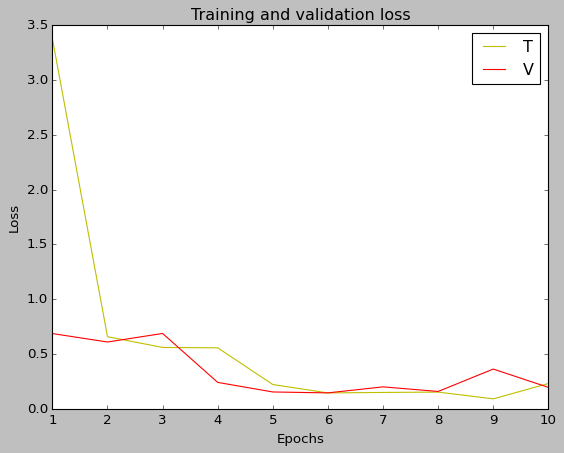

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='T')
plt.plot(epochs, val_loss, 'r', label='V')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

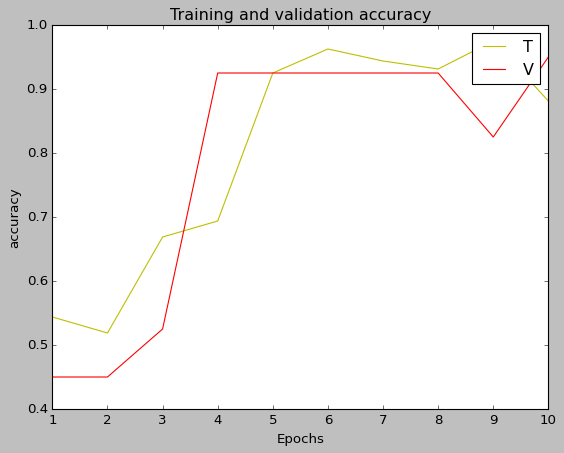

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'y', label='T')
plt.plot(epochs, val_accuracy, 'r', label='V')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
# load model
model = load_model('covid_model_10epochs3.h5')

In [ ]:
acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc[1] * 100), "%")


2/2 [==============================] - 0s 90ms/step - loss: 0.1971 - accuracy: 0.9500
Accuracy =  94.9999988079071 %


In [ ]:
mythreshold=0.3
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)

[[17  1]
 [ 1 21]]


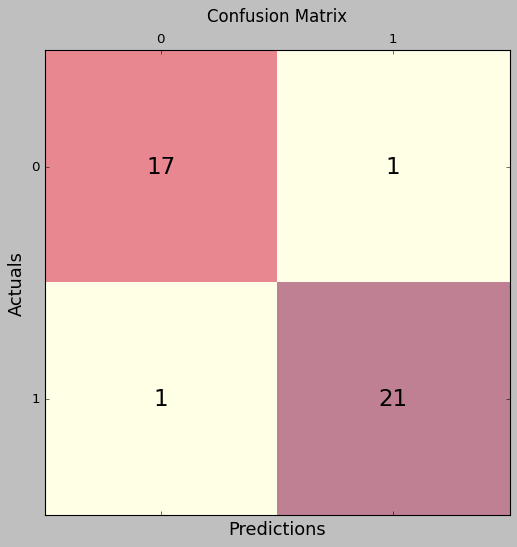

In [ ]:
mat_con=(confusion_matrix(y_test,y_pred))
fig, px = plt.subplots(figsize=(7.5, 7.5))
px.matshow(mat_con, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(mat_con.shape[0]):
    for n in range(mat_con.shape[1]):
        px.text(x=m,y=n,s=mat_con[m, n], va='center', ha='center', size='xx-large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [ ]:
y_pred

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [ ]:
y_test

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_pred, y_test)

0.898989898989899

The prediction for this image is:  [[0.9996797]]
The actual label for this image is:  1


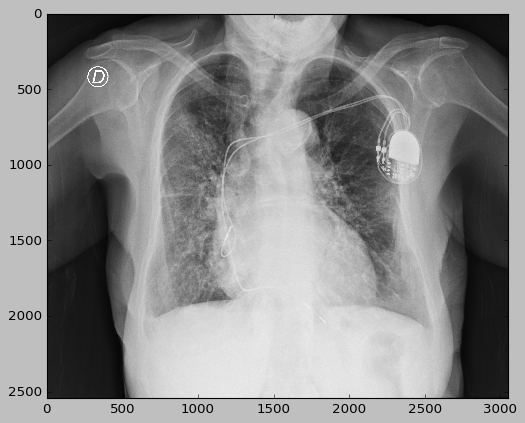

In [ ]:
image=Image.open('/content/drive/MyDrive/Colab Notebooks/DATA_NEW/COVID-19/COVID19(1).jpg').convert('RGB')
plt.imshow(image)
n=1#Select the index of image to be loaded for testing
img = X_test[n]

input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

In [ ]:
if(y_test[n]==1):
    print("COVID-19")
else:
    print("NORMAL")

COVID-19


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 528, 528, 3)
(40, 528, 528, 3)
(160,)
(40,)
